## Create a classification model to predict the gender (male or female) based on different acoustic parameters

The Dataset I am using contains data for identifying male and female voice based on different acoustic properties. 
So let's start this task by importing the basic python libraries.

### Importing the basic python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Importing Data

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Descriptive Analysis of the Dataset

In [3]:
print("Shape of Gender Voice Recognition is", df.shape)

Shape of Gender Voice Recognition is (3168, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Various factors important by statistical means like mean, standard deviation, median, count of values and maximum value etc. are shown below for numerical variables of our dataset.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [6]:
# Seeing what are the columns present in the dataset
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

There are 21 columns in this dataset, so it's important to check whether or not this dataset contains null values before going any further.

### Checking for Null values

In [7]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

From above, we can see that it have no null values.

### Processing Categorical Values

Here we will perform encoding. Encoding by converting 'label' feature into numerical form.

In [8]:
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])

In [9]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


### Visualization of the Dataset

The **label** column in this dataset is what we have predict. So let's see the distribution of the values of the *label* column.

In [10]:
d1 = df['label'].value_counts()
d1
# 1 is Male
# 0 is Female

1    1584
0    1584
Name: label, dtype: int64

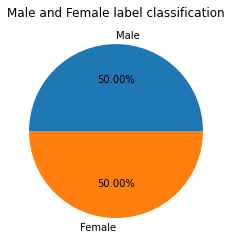

In [11]:
plt.pie(d1,labels=['Male','Female'],autopct="%.2f%%")
plt.title('Male and Female label classification')
plt.show()

From above, we get the visual representation with comparison between **male** and **female**. We can also see that our data is perfectly balanced. <br>
<br> Now let's have a look at the correlation among the dataset:

In [12]:
print(df.corr())

          meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.53

<AxesSubplot:xlabel='sd', ylabel='meanfreq'>

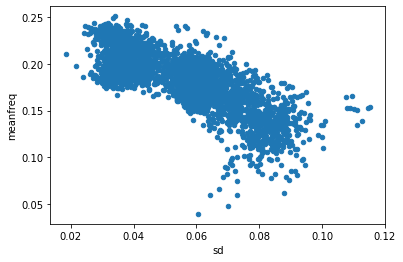

In [34]:
# Correlation Graph
df.plot.scatter(x = 1, y = 0)

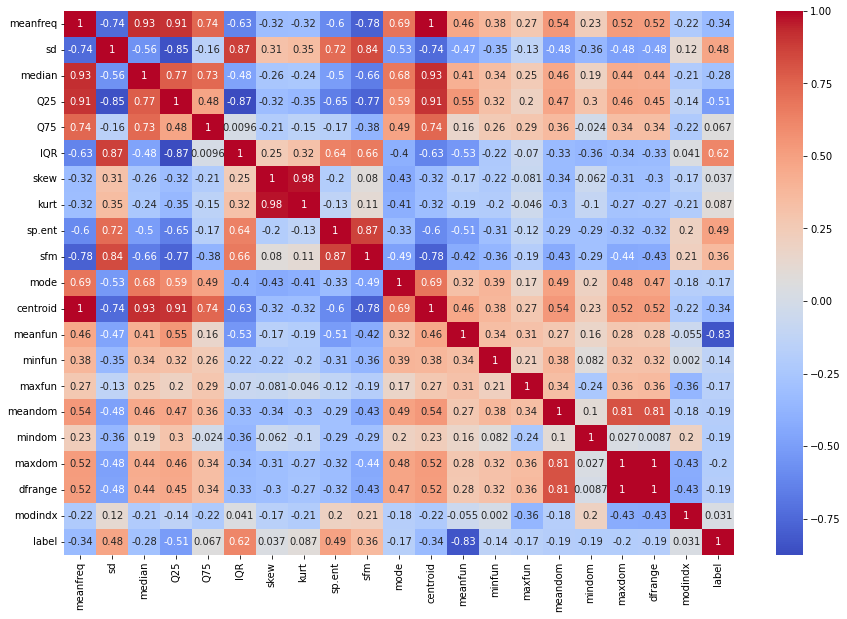

In [13]:
plt.figure(figsize = (15, 10))
correalation = df.corr()
sns.heatmap(correalation, cmap = 'coolwarm', annot = True)
plt.show()

### Selecting Features

Here we are selecting the independent and dependent variables for the training of the dataset.

In [14]:
# Selecting the independent variables(features) from the dataset
x = df.iloc[:,:-1]
x.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.0,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.0,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512


In [15]:
type(x)

pandas.core.frame.DataFrame

In [16]:
# Selecting the dependent variable from the dataset
y = df['label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [17]:
type(y)

pandas.core.series.Series

### Train-test Splitting
Here I am spliting the data into training and test sets and using different Machine Learning algorithms to train the model.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


### Applying Classifier Models
Before applying model we will create a function which will take input a model and help us to reuse the code again and again.

In [19]:
def algo_model(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print('Prediction')
    print(pred)
    print("Training score: ",model.score(x_train, y_train))
    print("Testing Score: ", model.score(x_test, y_test))
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred))
    print('Classification Report')
    print(classification_report(y_test, pred))

#### a.Decison Tree Classifier

In [20]:
# importing Decison Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_1 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=20)

algo_model(x_train, x_test, y_train, y_test, model_1)

Prediction
[1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1
 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 0

#### b.Random Forest Classifier

In [21]:
# importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=75, criterion='entropy')

algo_model(x_train, x_test, y_train, y_test, model_2)

Prediction
[1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1
 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 0

#### c.KNN Classifier

In [22]:
# importing K Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier

model_3 = KNeighborsClassifier(n_neighbors=27)

algo_model(x_train, x_test, y_train, y_test, model_3)

Prediction
[1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0

#### d.Logistic Regression

In [23]:
# importing Linear Regression Model
from sklearn.linear_model import LogisticRegression

model_4 = LogisticRegression(solver = 'liblinear')

algo_model(x_train, x_test, y_train, y_test, model_4)

Prediction
[1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1
 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1
 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 0

#### SVM Classifier

In [24]:
# importing SVC 
from sklearn.svm import SVC

#### using kernal as 'linear'

In [25]:
model_5 = SVC(kernel = 'linear', C = 10)
algo_model(x_train, x_test, y_train, y_test, model_5)

Prediction
[1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 0

#### using kernal as 'rbf'

In [26]:
model_6 = SVC(kernel = 'rbf', C = 10)
algo_model(x_train, x_test, y_train, y_test, model_6)

Prediction
[1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0
 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1
 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 0

#### using kernal as 'poly'

In [27]:
model_7 = SVC(kernel = 'poly', C = 10)
algo_model(x_train, x_test, y_train, y_test, model_7)

Prediction
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0

## Prediction on test data by using Random Forrest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_estimators=75, criterion='entropy')

In [29]:
model_2.fit(x_train, y_train)
pred = model_2.predict(x_test)
outputDF = pd.DataFrame({'Actual Label': y_test, 'Predicted Label': pred})
print(outputDF.head(20))

      Actual Label  Predicted Label
924              1                1
2391             0                0
10               1                1
3144             0                0
2803             0                0
686              1                1
1595             0                0
1496             1                1
1037             1                1
1309             1                1
460              1                1
1567             1                1
2562             0                0
1330             1                1
2436             0                0
1469             1                1
1565             1                1
1182             1                1
1283             1                1
2226             0                0


Finally from above we can see that the **Actual Label** and **Predicted Label** have same labels determining the high accuracy.

In [37]:
# Saving the model
import pickle
pickle_out = open('final_model.pkl', 'wb')
pickle.dump(model_2, pickle_out)

In [38]:
# load the model from disk
loaded_model = pickle.load(open('final_model.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result, '% Accuracy')

0.9747634069400631 % Accuracy


 <br>
Thank you 